In [242]:
## numerical librarires
import numpy as np
from numpy import linalg as la
import random
from scipy.integrate import quad
from scipy.integrate import nquad

## plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## diffusion maps
from diffusion_maps import run_diffusion_map

In [95]:
def func(x):
    return np.exp(-x**4 + 3*x**2)

In [96]:
def normalize_func(func, a=-10, b=10):
    norm,err = quad(func, a, b)
    return lambda x: func(x) / norm

In [80]:
func_norm = normalize_func(func)

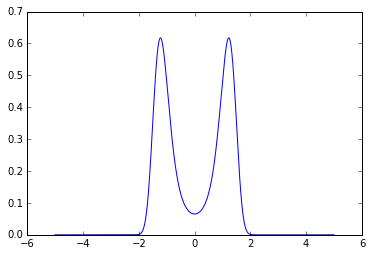

In [81]:
x = np.linspace(-5,5,1000)
plt.plot(x,func_norm(x))

In [82]:
def acceptance_rejection_sampling(func,a=-4,b=4,max_val=0.5,n=1000):
    count = 0
    xs = []; ys = []
    while count < n:
        x = random.uniform(a,b)
        y = random.uniform(0.,max_val)
        if y < func(x):
            xs.append(x)
            ys.append(y)
            count += 1
    return xs,ys

In [83]:
x,y = acceptance_rejection_sampling(func_norm)

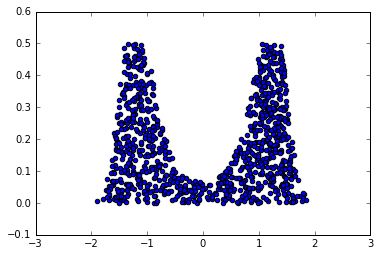

In [84]:
plt.scatter(x,y)

(array([  1.,   4.,  12.,  28.,  37.,  52.,  44.,  39.,  50.,  39.,  33.,
         23.,  24.,  15.,  11.,  13.,  14.,   9.,   9.,   8.,   4.,   7.,
          4.,  12.,  17.,  14.,  15.,  20.,  23.,  31.,  45.,  54.,  61.,
         58.,  46.,  65.,  33.,  18.,   3.,   5.]),
 array([-1.89804122, -1.8044002 , -1.71075917, -1.61711815, -1.52347713,
        -1.42983611, -1.33619509, -1.24255407, -1.14891305, -1.05527203,
        -0.961631  , -0.86798998, -0.77434896, -0.68070794, -0.58706692,
        -0.4934259 , -0.39978488, -0.30614386, -0.21250284, -0.11886181,
        -0.02522079,  0.06842023,  0.16206125,  0.25570227,  0.34934329,
         0.44298431,  0.53662533,  0.63026635,  0.72390738,  0.8175484 ,
         0.91118942,  1.00483044,  1.09847146,  1.19211248,  1.2857535 ,
         1.37939452,  1.47303555,  1.56667657,  1.66031759,  1.75395861,
         1.84759963]),
 <a list of 40 Patch objects>)

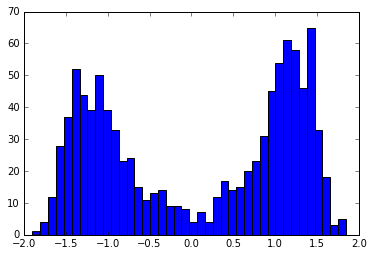

In [85]:
plt.hist(x,bins=40)

## Diffusion map

In [90]:
params = {}
params["epsilon"] = 0.22
params["gaussian_epsilon"] = 0.08
params["alpha"] = 0.5
params["eigen_dims"] = 5

In [91]:
x = sorted(x)
data = ([[val] for val in x])

In [92]:
e_vals, e_vecs = run_diffusion_map(data,params,symmetric=True)

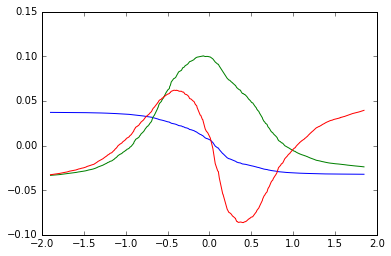

In [93]:
for i in range(1,4):
    plt.plot(x,e_vecs[:,i])

## Two Dimensional Potential 

This example is from https://arxiv.org/pdf/math/0503445v1.pdf

In [191]:
def func_2D(x,y):
    U = 1./4*x**4-25./12*x**3 + 9./2*x**2 + 25./2*y**2
    return np.exp(-U)

In [192]:
def normalize_func_2D(func, a=-10, b=10):
    norm,err = nquad(func, [[a,b],[a,b]]) 
    return lambda x,y: func(x,y) / norm

In [193]:
func_2d_norm = normalize_func_2D(func_2D)

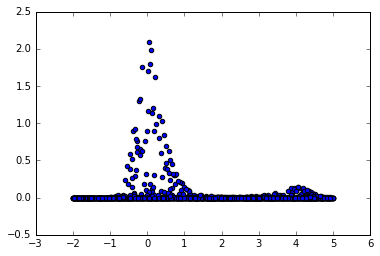

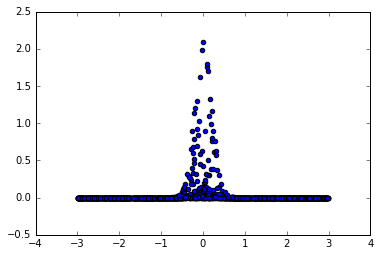

In [194]:
xs = [random.uniform(-2,5) for _ in range(2000)]
ys = [random.uniform(-3,3) for _ in range(2000)]
zs = [func_2d_norm(x,y) for x,y in zip(xs,ys)]
plt.scatter(xs,zs)
plt.show()
plt.scatter(ys,zs)
plt.show()

In [233]:
def acceptance_rejection_sampling(func,ranges=[[-2,5],[-3,3]],max_val=2.,n=2000):
    count = 0
    num_dependent_pars = len(ranges)
    xs = []; zs = []
    while count < n:
        x = [random.uniform(R[0],R[1]) for R in ranges]
        z = random.uniform(0.,max_val)
        if z < func(*x):
            xs.append(x)
            zs.append(z)
            count += 1
    return xs,zs

In [234]:
xs,zs = acceptance_rejection_sampling(func_2d_norm)

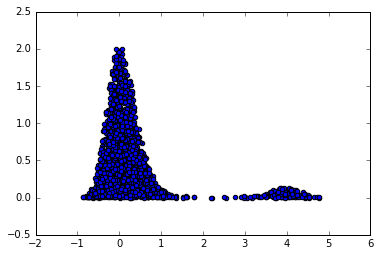

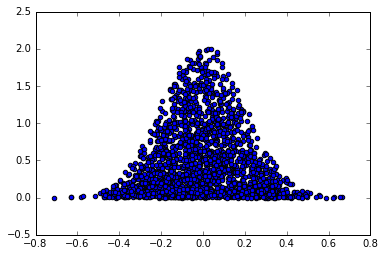

In [235]:
plt.scatter([x[0] for x in xs],zs)
plt.show()
plt.scatter([x[1] for x in xs],zs)
plt.show()

In [236]:
params = {}
params["epsilon"] = 2.
params["gaussian_epsilon"] = 1.
params["alpha"] = 1.
params["eigen_dims"] = 5

In [237]:
data = sorted(xs,key=lambda z: z[0])

In [238]:
e_vals, e_vecs = run_diffusion_map(data,params,symmetric=True)

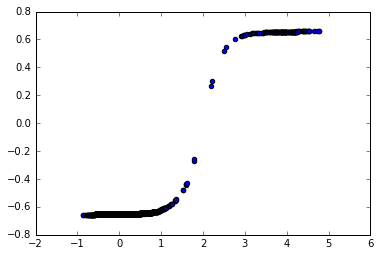

In [240]:
plt.scatter([x[0] for x in data],e_vecs.T[1])

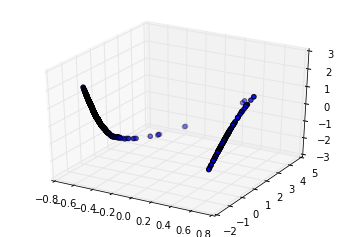

In [243]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(e_vecs.T[1],e_vecs.T[2],e_vecs.T[3])